# 파이썬 패키지를 이용하여 데이터 수집하기

## pandas data-reader 이용하기

###  주가데이터 받기

In [3]:
import pandas_datareader as pdr

TINGO_API_KEY = "c179c68a459f2347a84e20f77926f6840a9150be"
df = pdr.get_data_tiingo('GOOG', api_key=TINGO_API_KEY)
df.head()


adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
GOOG   2014-12-30 00:00:00+00:00    530.42  531.150  527.13   528.09   
       2014-12-31 00:00:00+00:00    526.40  532.600  525.80   531.25   
       2015-01-02 00:00:00+00:00    524.81  531.270  524.10   529.01   
       2015-01-05 00:00:00+00:00    513.87  524.330  513.06   523.26   
       2015-01-06 00:00:00+00:00    501.96  516.175  501.05   515.00   

                                  adjVolume   close  divCash     high     low  \
symbol date                                                                     
GOOG   2014-12-30 00:00:00+00:00     873923  530.42      0.0  531.150  527.13   
       2014-12-31 00:00:00+00:00    1371819  526.40      0.0  532.600  525.80   
       2015-01-02 00:00:00+00:00    1446662  524.81      0.0  531.270  524.10   
       2015-01-05 00:00:00+00:00    2054238  513.87      0.0  524.330  513.06   
       2015-01-06 00:00:00+00:00    2891950  501.96      0.0  516.175  501.05   

                                    open  splitFactor   volume  
symbol date                                                     
GOOG   2014-12-30 00:00:00+00:00  528.09          1.0   873923  
       2014-12-31 00:00:00+00:00  531.25          1.0  1371819  
       2015-01-02 00:00:00+00:00  529.01          1.0  1446662  
       2015-01-05 00:00:00+00:00  523.26          1.0  2054238  
       2015-01-06 00:00:00+00:00  515.00          1.0  2891950

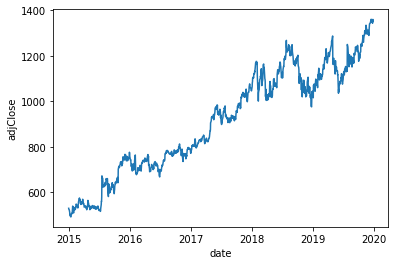

In [5]:
import seaborn as sns

sns.lineplot(x=df.index.levels[1], y="adjClose", data=df)

### 주가지수 데이터

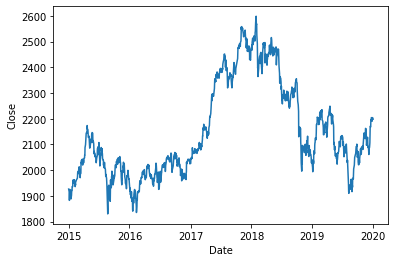

In [31]:
import pandas_datareader.data as web

df = web.DataReader('^KOSPI', 'stooq')
sns.lineplot(x=df.index, y="Close", data=df)

### 환율 데이터

In [5]:
import pandas_datareader.data as web

ALPHAVANTAGE_API_KEY = "c179c68a459f2347a84e20f77926f6840a9150be"
df_1 = web.DataReader("USD/KRW", "av-forex", api_key=ALPHAVANTAGE_API_KEY)
df_1.head()

,USD/KRW
From_Currency Code,USD
From_Currency Name,United States Dollar
To_Currency Code,KRW
To_Currency Name,South Korean Won
Exchange Rate,1157.50000000


### 원자재 가격 데이터

In [33]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2019, 12, 31)

oil = web.DataReader('DCOILWTICO', 'fred', start, end)
oil.head()

,DCOILWTICO
DATE,
2015-01-01,NaN
2015-01-02,52.72
2015-01-05,50.05
2015-01-06,47.98
2015-01-07,48.69


### 그외 경제지표 데이터

In [136]:
from pandas_datareader import wb

wb.search('gdp.*capita.*const')

,id,name,source,sourceNote,sourceOrganization,topics,unit
646,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth,
9165,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth,
9167,NY.GDP.PCAP.KN,GDP per capita (constant LCU),World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth,
9169,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation...",World Development Indicators,GDP per capita based on purchasing power parit...,"b'World Bank, International Comparison Program...",Economy & Growth,
9170,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",WDI Database Archives,,b'',,


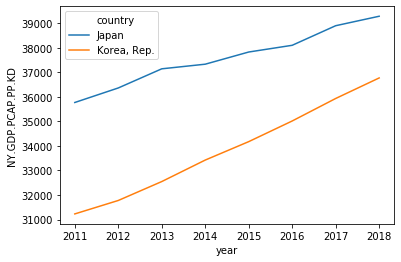

In [142]:
code = "NY.GDP.PCAP.PP.KD"
matches = wb.search('gdp.*capita.*const')
data = wb.download(indicator=code, country=['JPN', 'KOR'], start=2011, end=2018)
data = data.reset_index(drop=False)
sns.lineplot(x="year", y=code, hue="country", data=data)

## finance datareader 사용하기

### 전체 종목코드 수집하기

In [146]:
import FinanceDataReader as fdr

# KOSPI 종목 전체
kospi_cd = fdr.StockListing('KOSPI')
kospi_cd.head()

,Symbol,Name,Sector,Industry
0,155660,DSR,1차 비철금속 제조업,합섬섬유로프
1,001250,GS글로벌,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서..."
2,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
3,011070,LG이노텍,전자부품 제조업,기타 전자부품 제조업
4,010060,OCI,기초 화학물질 제조업,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매"


In [166]:
kospi_cd.loc[kospi_cd["Name"].str.find("삼성전자")>-1]

,Symbol,Name,Sector,Industry
352,005930,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반..."


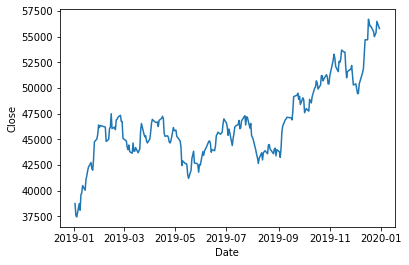

In [167]:
import seaborn as sns

df = fdr.DataReader("005930", '2019')
sns.lineplot(x=df.index, y=df["Close"])